# Home Description Project

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

In [3]:
df = pd.read_csv('final_zillow.csv')

In [4]:
df.rename(columns=df.iloc[0], inplace = True)
df.drop(0,inplace = True)
df.drop(df[df['Zestimate'] == '--'].index, inplace = True)

In [5]:
df.isnull().sum()[df.isnull().sum()/df.shape[0]>0.3]/df.shape[0]

Fireplaces            0.867804
Has Parking           0.735027
Agent Phone Number    0.646587
HOA Fee               0.675544
dtype: float64

In [6]:
df.drop(['Street Address','County','State','Country','Ziilow Id','Property Url','Agent Name','Agent Phone Number','Agent Email'
         ,'Agent License Number', 'Agency','MLS ID','Pictures','Time On Zillow','Living Area Unit','Fireplaces','Has Parking'
         ,'Currency','Description'], axis = 1, inplace = True)

In [7]:
# df['Fireplaces'] = df['Fireplaces'].map({'1':1,'1.0':1,'2.0':2,'3.0':3,'2':2,'0.0':0,'0':0,'4.0':4,'5.0':5,'3':3
#                       ,'6.0':6,'8.0':8,'4':4,'7.0':7,})

In [8]:
df['Living Area']=df['Living Area'].astype('float32')
df['Price'] = df['Price'].astype('float32')/10000
df['Zestimate'] = df['Zestimate'].astype('float32')/10000

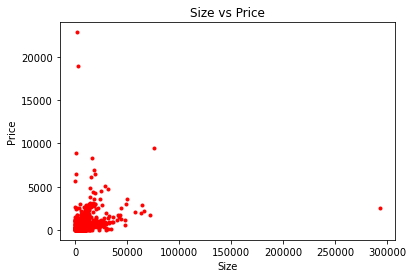

In [9]:
plt.scatter(df['Living Area'], df['Price'], c = "red", marker = ".")
plt.title('Size vs Price')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [10]:
df.drop(df[df['Price']>10000].index, inplace = True)
df.drop(df[df['Living Area']>250000].index, inplace = True)

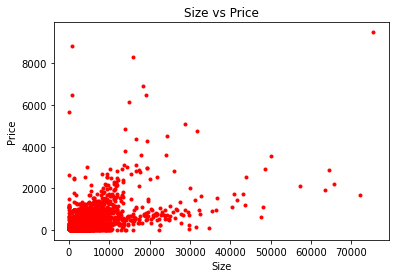

In [11]:
plt.scatter(df['Living Area'], df['Price'], c = "red", marker = ".")
plt.title('Size vs Price')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

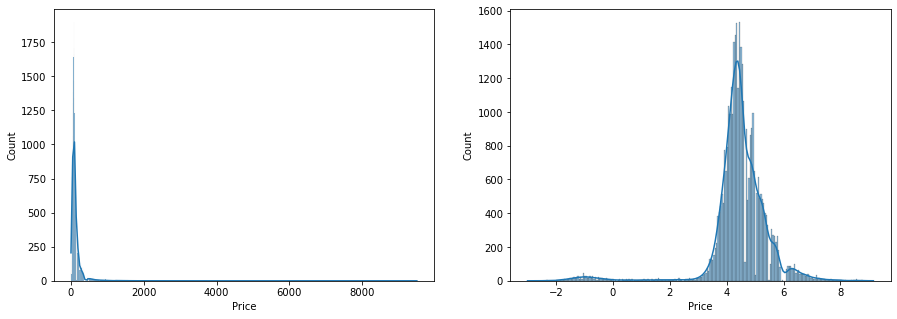

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.histplot( df['Price'], ax = ax[0], kde=True)
sns.histplot(np.log( df['Price']), ax = ax[1], kde=True)

## Simple manipulation 

###  HOA Fee

In [13]:
df=df.fillna({'HOA Fee': '0'})

In [14]:
df['HOA Fee'].value_counts(dropna = False) 

0                 23233
$400 monthly        243
$350 monthly        223
$300 monthly        214
$450 monthly        188
                  ...  
$672 monthly          1
$1,832 monthly        1
$1,392 monthly        1
$1,538 monthly        1
$1,228 monthly        1
Name: HOA Fee, Length: 1379, dtype: int64

In [15]:
df['HOA Fee'] = df['HOA Fee'].apply(lambda x: x.split()[0] if type(x)!= int else x)
df['HOA Fee'] = df['HOA Fee'].apply(lambda x: x.split('$')[-1] if type(x)!= int else x)
df['HOA Fee'] = df['HOA Fee'].apply(lambda x: x.split(',')[0]+x.split(',')[1] if len(x.split(','))>1 else x)
df['HOA Fee'] = df['HOA Fee'].apply(lambda x: int(x) if x!='Has' else x)

In [16]:
df['HOA Fee'].loc[df['HOA Fee']=='Has'] = df['HOA Fee'].loc[df['HOA Fee']!='Has'].median()
df['HOA Fee'] = df['HOA Fee'].astype(int)

### Other features

In [17]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False)

Has Fireplace      7375
MLS Name           7171
Zestimate          3533
Has Heating        3077
Heating            3077
Year Built         1193
Cooling            1130
Has Cooling        1077
Bedrooms           1020
Living Area         986
Bathrooms           962
Latitude             10
Longitude            10
Days On Zillow        2
View Count            1
Favourite Count       1
dtype: int64

#### City

In [18]:
df.groupby(['City'])['Price'].mean().sort_values(ascending = False).index

Index(['Beverly Hills', 'Santa Monica', 'Pacific Palisades', 'West Hollywood',
       'Venice', 'West Los Angeles', 'Beverly hills', 'Pasadena', 'CHATSWORTH',
       'Studio City', 'Culver City', 'Marina Del Rey', 'Encino',
       'Sherman Oaks', 'Los Angeles', 'Shadow Hills', 'Westchester',
       'Box Canyon', 'Long Beach', 'Playa Vista', 'La Tuna Canyon',
       'Valley Village', 'Studio city', 'Tarzana', 'Toluca Lake',
       'Porter Ranch', 'Torrance', 'Woodland Hills', 'La Crescenta',
       'Valley Glen', 'Sherman oaks', 'Playa Del Rey', 'North Hollywood',
       'lake balboa', 'LUTHERVILLE-TIMONIUM', 'Northridge', 'Culver Cty',
       'Granada Hills', 'Van Nuys', 'West Hills', 'Highland Park', 'Sunland',
       'Hollywood', 'Chatsworth', 'Marina del Rey', 'LOS ANGELES', 'Lomita',
       'San Pedro', 'Tujunga', 'Century City', 'Canoga Park', 'Sun Valley',
       'North Hills', 'Reseda', 'Winnetka', 'Baldwin Hills', 'Burbank',
       'Lake Balboa', 'Harbor City', 'Mission Hills',

In [19]:
# can be further grouped 
df['City'].value_counts()[df['City'].value_counts()<50]

Burbank                 48
Santa Monica            42
Toluca Lake             40
West Hollywood          38
Valley Glen             24
Lomita                  12
La Crescenta             8
Culver City              7
Kagel Canyon             6
Lake Balboa              5
Westchester              5
Arleta                   4
Hollywood                3
Eagle Rock               3
LOS ANGELES              3
Lake View Terrace        2
West Los Angeles         2
Studio city              2
Shadow Hills             1
N Hollywood              1
Baldwin Hills            1
Wonder lake              1
OAKLAND                  1
Beverly hills            1
Pasadena                 1
CHATSWORTH               1
Box Canyon               1
Culver Cty               1
Long Beach               1
La Tuna Canyon           1
Century City             1
Sherman oaks             1
lake balboa              1
Marina del Rey           1
LUTHERVILLE-TIMONIUM     1
Highland Park            1
Downey                   1
N

In [20]:
df['City'] = df['City'].replace('Beverly hills','Beverly Hills')
df['City'] = df['City'].replace('N Hollywood','North Hollywood')
df['City'] = df['City'].replace('LOS ANGELES','Los Angeles')
df['City'] = df['City'].replace('Los angeles','Los Angeles')

#### Has Fireplace

In [21]:
df['Has Fireplace'] = df['Has Fireplace'].map({'TRUE':'True','FALSE':'False'})

#### MLS Name

In [22]:
df['MLS Name'].value_counts()

CRMLS                                  15621
CLAW                                   11188
Zillow Rental Manager                    191
GAVAR                                     83
SDMLS                                     38
Zillow Rental Network_1                   32
Zillow Offers                             15
Zillow Rental Network Premium             15
JohnHart Real Estate                       7
Douglas Elliman                            5
RE/MAX International                       4
BHHS broker feed                           4
Bakersfield AOR / Golden Empire MLS        4
SBMLS                                      3
Glendale AOR ZDD                           2
Zillow Rental Network Premium_1            2
FresnoMLS                                  1
TCMLS                                      1
Help-U-Sell Real Estate                    1
BAREIS                                     1
Ojai Valley BOR                            1
CSMAOR                                     1
IMLS      

In [23]:
# No exceptionally high mean with enough samples
df.groupby(['MLS Name'])['Price'].mean()

MLS Name
BAREIS                                 112.500000
BHHS broker feed                         0.324975
Bakersfield AOR / Golden Empire MLS     63.174999
CLAW                                   185.488846
CRMLS                                   92.852043
CSMAOR                                   0.600000
Douglas Elliman                        111.211494
FresnoMLS                               91.000000
GAVAR                                   76.686806
Glendale AOR ZDD                        54.950001
Help-U-Sell Real Estate                 75.000000
IMLS                                    28.914101
JohnHart Real Estate                     0.640714
North Santa Barbara County MLS          50.000000
Ojai Valley BOR                        125.000000
RE/MAX International                    49.010002
SBMLS                                  303.024139
SDMLS                                   92.857895
TCMLS                                   75.000000
Zillow Offers                           8

In [24]:
zillow = ['Zillow Rental Manager',"Zillow Rental Network_1","Zillow Offers"
          ,"Zillow Rental Network Premium",'Zillow Rental Network Premium_1']
main_MLS = ['CRMLS', 'CLAW', 'GAVAR']
df['MLS Name'] = df['MLS Name'].apply(lambda x: x if x in main_MLS else ('Zillow' if x in zillow else 'other'))

#### Heating

In [25]:
df['Heating'].loc[df['Heating'] == '[]'] = np.nan

In [26]:
def strip(s):
    return [i.split("'")[1] for i in s.split('[')[-1].split(']')[0].split(',')]
df['Heating'] = df['Heating'].apply(lambda x: strip(x) if type(x)!= float else x)

In [27]:
def extract_from_list(df_col):
    D = {}
    for i in df_col: 
        for j in i: 
            if j not in D: 
                D[j] = 1 
            else: 
                D[j] += 1
    return D 

In [28]:
extract_from_list(df['Heating'][df['Heating'].notnull()])

{'None': 701,
 'Forced air': 2304,
 'Central': 18831,
 'Floor Furnace': 411,
 'Wall': 1812,
 'ENERGY STAR Qualified Equipment': 142,
 'Fireplace(s)': 1189,
 'Wall Gas': 312,
 'Forced Air': 1891,
 'Natural Gas': 1399,
 'Other': 2740,
 'Solar': 156,
 'Wall Furnace': 1037,
 'Gas': 744,
 'Electric': 539,
 'Radiant': 215,
 'Wall Electric': 74,
 'Central Heat/Gas': 34,
 'Has Heating (Unspecified Type)': 38,
 'Baseboard': 68,
 'High Efficiency': 106,
 'Combination': 78,
 'See Remarks': 141,
 'Gravity': 67,
 'Buyer To Verify': 1,
 'Stove': 25,
 'Heat Pump': 96,
 'Heat pump': 28,
 'Space Heater': 27,
 'wood': 22,
 'Central Heat/Elec': 5,
 'Zoned': 251,
 'Hot Water': 5,
 'Combination Heating': 2,
 'Other Heat Source (See Remarks)': 6,
 'Wood': 24,
 'central': 2,
 'Wood / Pellet': 24,
 'Geothermal': 4,
 'Solar Heat Other': 4,
 'yes': 2,
 'Oil': 1,
 'Other/Remarks': 1,
 'Wood Stove': 4,
 'Propane': 5,
 'Coal': 1,
 'Propane / Butane': 1,
 'Humidity Control': 4}

In [29]:
df['Has Heating'].value_counts(dropna = False)

True     15274
TRUE     14160
NaN       3077
False     1161
FALSE      721
Name: Has Heating, dtype: int64

In [30]:
df['Has Heating'] = df['Has Heating'].map({'TRUE':'True','FALSE':'False'})

#### Year Built

In [31]:
df['Year Built'].loc[df['Year Built'].isnull()] = 0
df['Year Built'] = df['Year Built'].apply(lambda x: int(x))

In [32]:
df['Year Built'].loc[df['Year Built'].notnull()] = 2022-df['Year Built'].loc[df['Year Built'].notnull()]

In [33]:
df['Year Built'].loc[df['Year Built']== 2022] = 0

#### Cooling 

In [34]:
df['Has Cooling'] = df['Has Cooling'].map({'TRUE':'True','FALSE':'False'})

In [35]:
df['Has Cooling'].value_counts(dropna = False)

NaN      18584
True     14750
False     1059
Name: Has Cooling, dtype: int64

In [36]:
df['Cooling'].loc[df['Cooling'] == '[]'] = np.nan
df['Cooling'] = df['Cooling'].apply(lambda x: strip(x) if type(x)!= float else x)

In [37]:
extract_from_list(df['Cooling'][df['Cooling'].notnull()])

{'Gas': 273,
 'Other': 1298,
 'Central Air': 18580,
 'Wall/Window Unit(s)': 1349,
 'None': 3856,
 'ENERGY STAR Qualified Equipment': 223,
 'Electric': 596,
 'Air Conditioning': 3485,
 'Ceiling Fan(s)': 616,
 'High Efficiency': 167,
 'Zoned': 646,
 'Central': 2940,
 'Evaporative Cooling': 52,
 'Central Air/Refrig': 51,
 'Wall Unit(s)': 466,
 'Window Unit(s)': 168,
 'Dual': 551,
 'See Remarks': 364,
 'Wall': 140,
 'Central Forced Air': 25,
 'SEER Rated 13-15': 37,
 'Heat Pump': 76,
 'Whole House Fan': 73,
 'Attic Fan': 193,
 'Solar': 29,
 'SEER Rated 16+': 19,
 'Evaporative': 9,
 'Central Air/Evap': 12,
 'Other/Remarks': 1,
 'Evap Wall/Window': 8,
 'Refrigerator': 21,
 'Wall Units  Heat/Ac': 1,
 'Swamp Cooler(s)': 7,
 'Room Refrig Air': 4,
 'Central Heat & Cool': 1,
 'Humidity Control': 5,
 'Geothermal': 2,
 'Yes': 1,
 'Refridge Wall/Window': 4,
 'Buyer To Verify': 1,
 'New Ac Unit': 1}

#### Bedroom & bathroom

In [38]:
df['Bedrooms'][df['Bedrooms'].notnull()] = df['Bedrooms'][df['Bedrooms'].notnull()].apply(lambda x: int(x))

In [39]:
# ?
df['Bedrooms'][df['Bedrooms'].notnull()].value_counts()

3.0     11606
2.0      8752
4.0      6220
5.0      2374
1.0      2145
6.0       937
7.0       302
8.0       298
0.0       213
10.0      120
12.0       95
9.0        75
11.0       31
16.0       28
13.0       26
14.0       24
18.0       15
20.0       11
15.0       11
22.0        8
17.0        7
25.0        5
35.0        5
28.0        5
23.0        5
19.0        4
30.0        4
26.0        3
37.0        3
36.0        3
32.0        3
39.0        3
21.0        3
33.0        3
31.0        3
24.0        2
44.0        2
50.0        2
48.0        2
42.0        2
94.0        1
54.0        1
57.0        1
49.0        1
43.0        1
40.0        1
64.0        1
34.0        1
92.0        1
62.0        1
47.0        1
85.0        1
88.0        1
Name: Bedrooms, dtype: int64

In [40]:
df['Bathrooms'][df['Bathrooms'].notnull()] = df['Bathrooms'][df['Bathrooms'].notnull()].apply(lambda x: float(x))

In [41]:
df['Bathrooms'].value_counts()

2.00     13071
3.00      8704
1.00      5243
4.00      3006
5.00      1102
         ...  
29.00        1
2.75         1
26.00        1
44.00        1
57.00        1
Name: Bathrooms, Length: 67, dtype: int64

#### Living Area

In [42]:
def to_int_float(df_slice, type_):
    return df_slice[df_slice.notnull()].apply(lambda x: type_(x))

In [43]:
df['Living Area'][df['Living Area'].notnull()] = to_int_float(df['Living Area'],float)
df['Days On Zillow'][df['Days On Zillow'].notnull()] = to_int_float(df['Days On Zillow'],int)
df['Latitude'][df['Latitude'].notnull()] = to_int_float(df['Latitude'],float)
df['Longitude'][df['Longitude'].notnull()] = to_int_float(df['Longitude'],float)
df['View Count'][df['View Count'].notnull()] = to_int_float(df['View Count'],int)
df['Favourite Count'][df['Favourite Count'].notnull()] = to_int_float(df['Favourite Count'],int)

In [44]:
df['Property Type'].value_counts()

SINGLE_FAMILY        19988
CONDO                 7706
MULTI_FAMILY          3176
TOWNHOUSE             2282
HOME_TYPE_UNKNOWN      674
APARTMENT              567
Name: Property Type, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34393 entries, 1 to 34397
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              34393 non-null  object 
 1   Zipcode           34393 non-null  object 
 2   Bedrooms          33373 non-null  object 
 3   Bathrooms         33431 non-null  object 
 4   Property Status   34393 non-null  object 
 5   Property Type     34393 non-null  object 
 6   Living Area       33407 non-null  float32
 7   Zestimate         30860 non-null  float32
 8   Has Cooling       15809 non-null  object 
 9   Cooling           30322 non-null  object 
 10  Has Fireplace     13370 non-null  object 
 11  Has Heating       14881 non-null  object 
 12  Heating           29434 non-null  object 
 13  Parking Capacity  34393 non-null  object 
 14  Parking           34393 non-null  object 
 15  Price             34393 non-null  float32
 16  Year Built        34393 non-null  int64 

In [46]:
df = df.fillna({'Days on Zillow': df['Days On Zillow'].mean(), 'View Count':df['View Count'].mean(),
'Favourite Count': df['Favourite Count'].mean()})

## EDA

In [47]:
# Separate
df_sold = df[df['Property Status'] != 'FOR_RENT'].copy(deep = True)
df_rent = df[df['Property Status'] == 'FOR_RENT'].copy(deep = True)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34135 entries, 1 to 34397
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              34135 non-null  object 
 1   Zipcode           34135 non-null  object 
 2   Bedrooms          33115 non-null  object 
 3   Bathrooms         33173 non-null  object 
 4   Property Status   34135 non-null  object 
 5   Property Type     34135 non-null  object 
 6   Living Area       33149 non-null  float32
 7   Zestimate         30663 non-null  float32
 8   Has Cooling       15676 non-null  object 
 9   Cooling           30064 non-null  object 
 10  Has Fireplace     13342 non-null  object 
 11  Has Heating       14748 non-null  object 
 12  Heating           29187 non-null  object 
 13  Parking Capacity  34135 non-null  object 
 14  Parking           34135 non-null  object 
 15  Price             34135 non-null  float32
 16  Year Built        34135 non-null  int64 

In [50]:
df_sold['Heating'][df_sold['Heating'].notnull()] = df_sold['Heating'][df_sold['Heating'].notnull()].apply(lambda x: x[0])
df_sold['Cooling'][df_sold['Cooling'].notnull()] = df_sold['Cooling'][df_sold['Cooling'].notnull()].apply(lambda x: x[0])

In [51]:
df_sold['Cooling'].unique()

array(['Gas', nan, 'Central Air', 'Wall/Window Unit(s)', 'None',
       'Electric', 'Air Conditioning', 'Ceiling Fan(s)',
       'High Efficiency', 'Central', 'Evaporative Cooling', 'Other',
       'Central Air/Refrig', 'Wall Unit(s)', 'Window Unit(s)',
       'See Remarks', 'Wall', 'Central Forced Air', 'Dual', 'Heat Pump',
       'Zoned', 'Evaporative', 'Central Air/Evap', 'Other/Remarks',
       'ENERGY STAR Qualified Equipment', 'Evap Wall/Window',
       'Refrigerator', 'Wall Units  Heat/Ac', 'Swamp Cooler(s)',
       'Attic Fan', 'Whole House Fan', 'Room Refrig Air',
       'Central Heat & Cool', 'Solar', 'Yes', 'Refridge Wall/Window',
       'Buyer To Verify'], dtype=object)

In [52]:
df_sold = df_sold.replace({'Heating':{'central':'Central','Wall Gas':'Gas','None':np.nan, 'Fireplace(s)':np.nan
                   ,'Wall Furnace':'Wall','Central Heat/Gas':'Central','Natural Gas':'Gas'
                   ,'Has Heating (Unspecified Type)':'Other','See Remarks':'Other'
                  ,'Central Heat/Elec':'Central','Heat pump':'Hot Water','Heat Pump':'Hot Water'
                  ,'ENERGY STAR Qualified Equipment':'Other','Combination Heating':'Combination'
                  ,'Wall Electric':'Wall','Zoned':'Other','Gravity':'Other','yes':'Other'
                  ,'High Efficiency':'Other','Solar Heat Other':'Solar'
                  ,'Other/Remarks':'Other','Wood Stove':'Stove', 'Other Heat Source (See Remarks)':'Other'
                  ,'Propane':'Gas','Forced air':'Forced Air'}})

In [53]:
df_sold = df_sold.replace({'Cooling':{'Central Air':'Central', 'Wall/Window Unit(s)':'Wall', 'None':np.nan,
               'Ceiling Fan(s)':'Fan','Central Air/Evap':'Central', 'Other/Remarks':'Other',
               'High Efficiency':'Other', 'Evaporative Cooling':'Evaporative',
               'Central Air/Refrig':'Central', 'Wall Unit(s)':'Wall', 'Window Unit(s)':'Wall',
               'See Remarks':'Other', 'Central Forced Air':'Central','Zoned':'Other', 
               'ENERGY STAR Qualified Equipment':'Other', 'Evap Wall/Window':'Wall',
               'Refrigerator':'Air Conditioning', 'Wall Units  Heat/Ac':'Wall', 'Swamp Cooler(s)':'Evaporative',
               'Attic Fan':'Fan', 'Whole House Fan':'Fan', 'Room Refrig Air':'Air Conditioning',
               'Central Heat & Cool':'Central',  'Yes':'Other', 'Refridge Wall/Window':'Air Conditioning',
               'Buyer To Verify':'Other'}})

### Zestimate

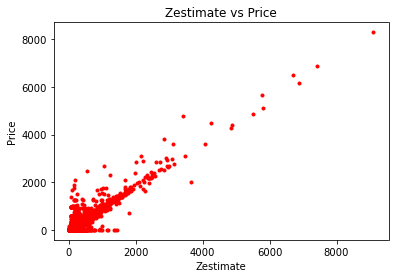

In [54]:
plt.scatter(df_sold['Zestimate'],df_sold['Price'], c = "red", marker = ".")
plt.title('Zestimate vs Price')
plt.xlabel("Zestimate")
plt.ylabel("Price")
plt.show()

In [55]:
mask = (df_sold['Price'] <10)&((df_sold['Property Status'] == 'RECENTLY_SOLD')|(df_sold['Property Status'] == 'SOLD'))

In [56]:
df_sold = df_sold[~np.array(mask)]

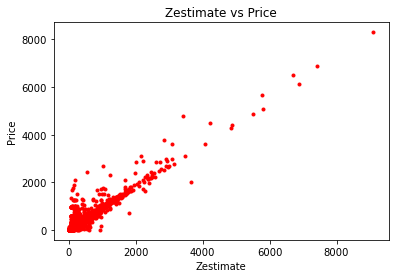

In [57]:
plt.scatter(df_sold['Zestimate'],df_sold['Price'], c = "red", marker = ".")
plt.title('Zestimate vs Price')
plt.xlabel("Zestimate")
plt.ylabel("Price")
plt.show()

In [58]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_sold['Zestimate'][df_sold['Zestimate'].notnull()], df_sold['Price'][df_sold['Zestimate'].notnull()])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.960


In [59]:
# coefficient of determination

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df_sold['Zestimate'][df_sold['Zestimate'].notnull()].to_numpy().reshape(-1,1)
y = df_sold['Price'][df_sold['Zestimate'].notnull()]
lr.fit(x,y)
print('Coefficient of determination R^2: ',lr.score(x,y))

Coefficient of determination R^2:  0.9208577662448441


In [60]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x,y)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print('Coefficient of determination R^2: ',ridge.score(x,y))

Best alpha : 60.0
Coefficient of determination R^2:  0.9208577657684294


In [61]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x.ravel(),y)

In [62]:
print(slope, intercept)

0.9386077836408443 -0.9496737557620634


### City
!consider changing to categorical variable: High price zone, medium price zone...

In [63]:
top5_area = df_sold.groupby(['City'])['Price'].median().sort_values(ascending = False)[:5]
bottom5_area = df_sold.groupby(['City'])['Price'].median().sort_values(ascending = False)[-6:-1]

In [64]:
top5_area

City
Beverly Hills        342.00
Santa Monica         325.00
Pacific Palisades    310.00
Venice               193.50
West Los Angeles     189.25
Name: Price, dtype: float32

In [65]:
mask = df_sold['City'].apply(lambda x: True if x in 
                                 (top5_area.index.to_list()+ bottom5_area.index.to_list()) else False)

<AxesSubplot:xlabel='Price', ylabel='City'>

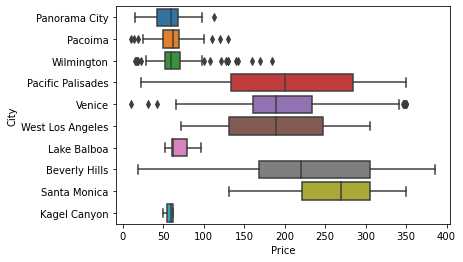

In [66]:
sns.boxplot(x = df_sold[['City','Price']][df_sold['Price']<400][mask].iloc[:,1]
            , y = df_sold[['City','Price']][df_sold['Price']<400][mask].iloc[:,0])

In [67]:
df_sold = df_sold.replace({'City':{'Los angeles':'Los Angeles','CHATSWORTH':'Chatsworth'}})

In [68]:
minor_city = df_sold['City'].value_counts()[df_sold['City'].value_counts()<50].index
df_sold['City'] = df_sold['City'].apply(lambda x: 'Other' if x in minor_city else x)

### Rooms

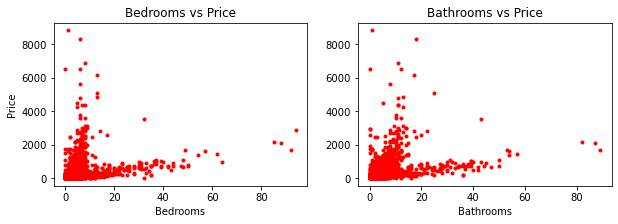

In [69]:
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].scatter(df_sold['Bedrooms'],df_sold['Price'], c = "red", marker = ".")
ax[0].set(xlabel = "Bedrooms", ylabel = 'Price',title = 'Bedrooms vs Price')
ax[1].scatter(df_sold['Bathrooms'],df_sold['Price'], c = "red", marker = ".")
ax[1].set(xlabel = "Bathrooms",title = 'Bathrooms vs Price')
plt.show()

In [70]:
df.drop(df_sold[(df_sold['Living Area']>20000) & (df_sold['Bedrooms']<2)].index, inplace = True)

### Other categorical features

In [71]:
df_sold = df_sold.replace({'Heating':{'central':'Central','Wall Gas':'Gas','None':np.nan, 'Fireplace(s)':np.nan
                   ,'Wall Furnace':'Wall','Central Heat/Gas':'Central','Natural Gas':'Gas'
                   ,'Has Heating (Unspecified Type)':'Other','See Remarks':'Other'
                  ,'Central Heat/Elec':'Central','Heat pump':'Hot Water','Heat Pump':'Hot Water'
                  ,'ENERGY STAR Qualified Equipment':'Other','Combination Heating':'Combination'
                  ,'Wall Electric':'Wall','Zoned':'Other','Gravity':'Other','yes':'Other'
                  ,'High Efficiency':'Other','Solar Heat Other':'Solar'
                  ,'Other/Remarks':'Other','Wood Stove':'Stove', 'Other Heat Source (See Remarks)':'Other'
                  ,'Propane':'Gas','Forced air':'Forced Air'}})

In [72]:
df.groupby(['Property Type'])['Price'].mean()

Property Type
APARTMENT             83.024910
CONDO                 79.292328
HOME_TYPE_UNKNOWN    178.652649
MULTI_FAMILY         161.104538
SINGLE_FAMILY        157.760727
TOWNHOUSE             74.289398
Name: Price, dtype: float32

<BarContainer object of 5 artists>

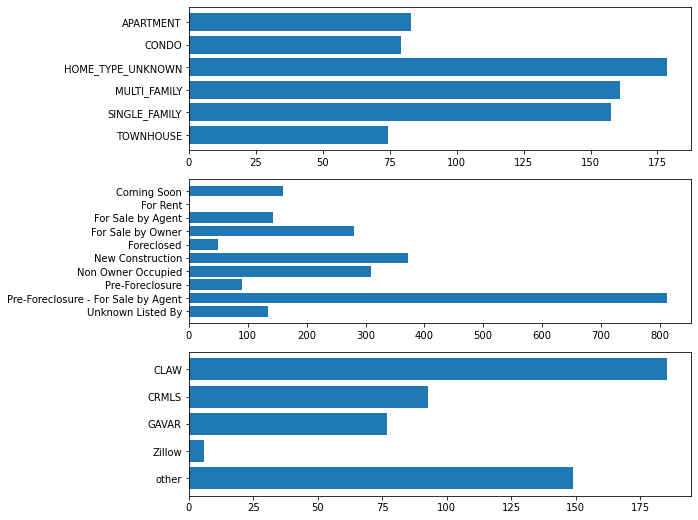

In [73]:
fig, ax = plt.subplots(3,1,figsize = (9,9))
ax[0].invert_yaxis()
ax[0].barh(df.groupby(['Property Type'])['Price'].mean().index, df.groupby(['Property Type'])['Price'].mean())
ax[1].invert_yaxis()
ax[1].barh(df.groupby(['Listing Type'])['Price'].mean().index, df.groupby(['Listing Type'])['Price'].mean())
ax[2].invert_yaxis()
ax[2].barh(df.groupby(['MLS Name'])['Price'].mean().index, df.groupby(['MLS Name'])['Price'].mean())


<AxesSubplot:xlabel='Price', ylabel='Count'>

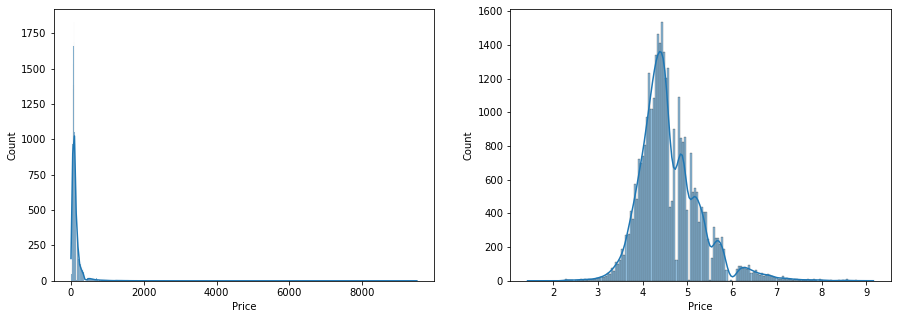

In [74]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.histplot(df_sold['Price'], ax = ax[0], kde=True)
sns.histplot(np.log( df_sold['Price']), ax = ax[1], kde=True)

In [75]:
index = df_sold['City'].value_counts()[df_sold['City'].value_counts()<200].index
df_sold['City'] = df_sold['City'].apply(lambda x: 'Other' if x in index else x)

In [76]:
df_sold.drop(['Zipcode','Parking'], axis = 1, inplace  = True)

In [77]:
for i in ['Bedrooms','Bathrooms','Parking Capacity','Days On Zillow','Latitude','Longitude']:
    df_sold[i] = df_sold[i].astype(float)

In [78]:
X = pd.get_dummies(df_sold.loc[:,df_sold.columns!= "Price"]).fillna(0).drop([21692])

In [79]:
from sklearn.model_selection import train_test_split #cross_val_score, KFold, 
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , np.log(df_sold["Price"].drop([21692])), test_size = 0.3, random_state = 0)

In [80]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)


In [81]:
from sklearn.metrics import mean_squared_error
#kf = KFold(n_splits=15, random_state=42, shuffle=True)

# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# def cv_rmse(model, X = X, y = y):
#     rmse = np.sqrt(-cross_val_score(model, X, y,
#                                     scoring="neg_mean_squared_error", cv=kf))
#     return (rmse)

def prediction_plot(y_train_pred, y_test_pred, y_train, y_test): 
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data", s = 1)
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Testing data", s = 1)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.show()

def evaluate(model):
    model.fit(X_train, y_train)
    # Look at predictions on training and validation set
    print("RMSE of training set: ", round(rmsle(y_train, model.predict(X_train)),4))
    print("RMSE of testing  set: ", round(rmsle(y_test, model.predict(X_test)),4))
    
    print("R square of training set: ", round(model.score(X_train, y_train),4))
    print("R square of testing  set: ", round(model.score(X_test, y_test),4))
    prediction_plot(model.predict(X_train), model.predict(X_test), y_train, y_test)

RMSE of training set:  0.1837
RMSE of testing  set:  0.2378
R square of training set:  0.9268
R square of testing  set:  0.881


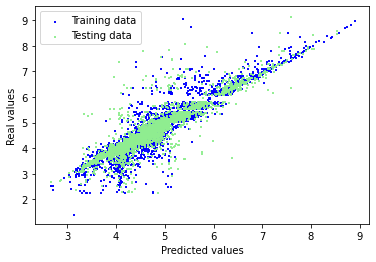

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth = 10)
evaluate(rf)

In [83]:
inp_df = pd.DataFrame({'Feature':X.columns, 'Importance':rf.feature_importances_*10}).sort_values(by = 'Importance', ascending = False)
inp_df[inp_df['Importance']>0.01]

,Feature,Importance
3,Zestimate,7.391803
2,Living Area,1.086948
60,Has Cooling_True,0.583561
8,Longitude,0.162026
7,Latitude,0.156046
11,HOA Fee,0.115721
6,Days On Zillow,0.070551
9,View Count,0.054031
5,Year Built,0.044639
59,Has Cooling_False,0.036930


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='Adam', loss='mean_squared_error')

record = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1000,
              epochs=100
             )

Epoch 1/100
24/24 [==============================] - 1s 25ms/step - loss: 83.5280 - val_loss: 2.2508
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 18.4275 - val_loss: 0.8780
Epoch 3/100
24/24 [==============================] - 0s 16ms/step - loss: 0.8432 - val_loss: 0.4897
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 21.3411 - val_loss: 1.2053
Epoch 5/100
24/24 [==============================] - 0s 15ms/step - loss: 20.3303 - val_loss: 0.9835
Epoch 6/100
24/24 [==============================] - 0s 15ms/step - loss: 32.1962 - val_loss: 0.3738
Epoch 7/100
24/24 [==============================] - 0s 15ms/step - loss: 0.2395 - val_loss: 0.1727
Epoch 8/100
24/24 [==============================] - 0s 16ms/step - loss: 0.8366 - val_loss: 0.1942
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 7.5879 - val_loss: 0.5029
Epoch 10/100
24/24 [==============================] - 0s 15ms/step - loss: 2.7331 - val_loss: 0

In [85]:
mask =((model.predict(X_train)<800) | (model.predict(X_train)<800))

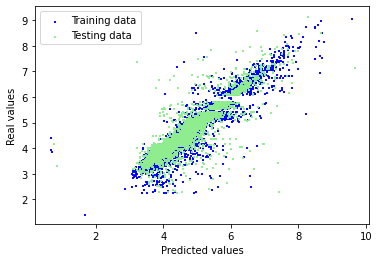

In [86]:
prediction_plot(model.predict(X_train)[mask.ravel()],model.predict(X_test), y_train[mask.ravel()], y_test)


RMSE of training set:  0.1836
RMSE of testing  set:  0.233
R square of training set:  0.9269
R square of testing  set:  0.8856


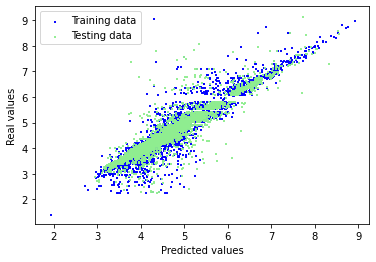

In [87]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(random_state=42,max_depth = 4)
evaluate(xgboost)

In [88]:
X = X[inp_df[inp_df['Importance']>0.01].Feature]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log(df_sold["Price"].drop([21692])), test_size = 0.3, random_state = 0)

RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)


RMSE of training set:  0.1833
RMSE of testing  set:  0.2321
R square of training set:  0.9272
R square of testing  set:  0.8865


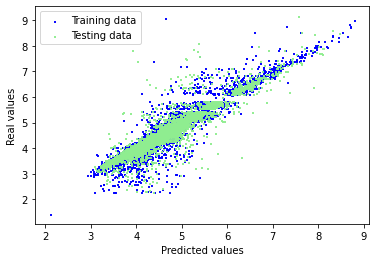

In [90]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(random_state=42,max_depth = 4)
evaluate(xgboost)

In [118]:
X_new2 = df_sold[['Zestimate','Living Area']][(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]
Y_new2 = df_sold["Price"].drop([21692])[(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]

In [151]:
X_new2[(X_new2['Zestimate']<1000)&(X_new2['Living Area']<5000)].max()

Zestimate       985.309998
Living Area    4999.000000
dtype: float32

In [166]:
lr2 = LinearRegression()

lr2.fit(X_new2/100,Y_new2/100)
print('Coefficient of determination R^2: ',lr2.score(X_new2/100,Y_new2/100))

Coefficient of determination R^2:  0.9222836621489557


In [127]:
x_1 = df_sold[['Living Area']][(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]
y_1 = df_sold["Price"].drop([21692])[(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]
lr3 = LinearRegression()
lr3.fit(x_1,y_1)
print('Coefficient of determination R^2: ',lr3.score(x_1,y_1))

Coefficient of determination R^2:  0.45680071539797906


In [161]:
((X_new2[(X_new2['Zestimate']<1000)&(X_new2['Living Area']<5000)])/100).max()

Zestimate       9.853100
Living Area    49.990002
dtype: float32

In [176]:
# Prepare data
X = ((X_new2[(X_new2['Zestimate']<1000)&(X_new2['Living Area']<5000)])/100).values.reshape(-1,2)
Y = (Y_new2[(X_new2['Zestimate']<1000)&(X_new2['Living Area']<5000)])/100

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(0, 10, 20)  # range of price values
yy_pred = np.linspace(0, 50, 20)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = lr2.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = lr2.score(X_new2/100,Y_new2/100)



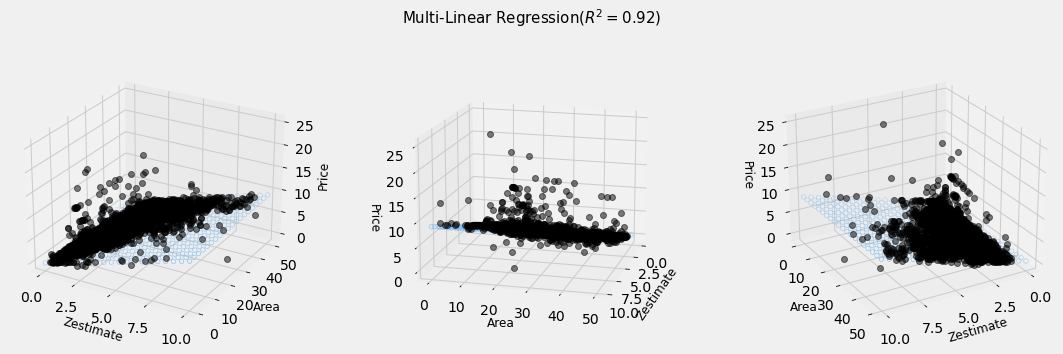

In [181]:
# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Zestimate', fontsize=12)
    ax.set_ylabel('Area', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

In [123]:
X_new3 = df_sold[['Zestimate','Living Area','HOA Fee','Year Built']][(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]
Y_new3 = df_sold["Price"].drop([21692])[(df_sold['Zestimate'].notnull())&(df_sold['Living Area'].notnull())]
lr3 = LinearRegression()

lr3.fit(X_new3,Y_new3)
print('Coefficient of determination R^2: ',lr3.score(X_new3,Y_new3))

Coefficient of determination R^2:  0.9222871146769583
